<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_16_5_UL_Dimensionality_reduction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA - Principal Components Analysis**

We will upload **penguins** dataset. As you can see, we have **four dimensions** and a **species** name assigned to each penguin (variable species). There are 342 penguins in total.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# download 'penquins' data
penguins = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/14/penguins.csv')
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [3]:
# create features and specias variables
features = ['CulmenLength' , 'CulmenDepth' , 'FlipperLength' , 'BodyMass']
target = 'Species'

data , target = penguins[features] , penguins[target]

In [4]:
# drop missing values
penguins.dropna(inplace=True)
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [5]:
penguins['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

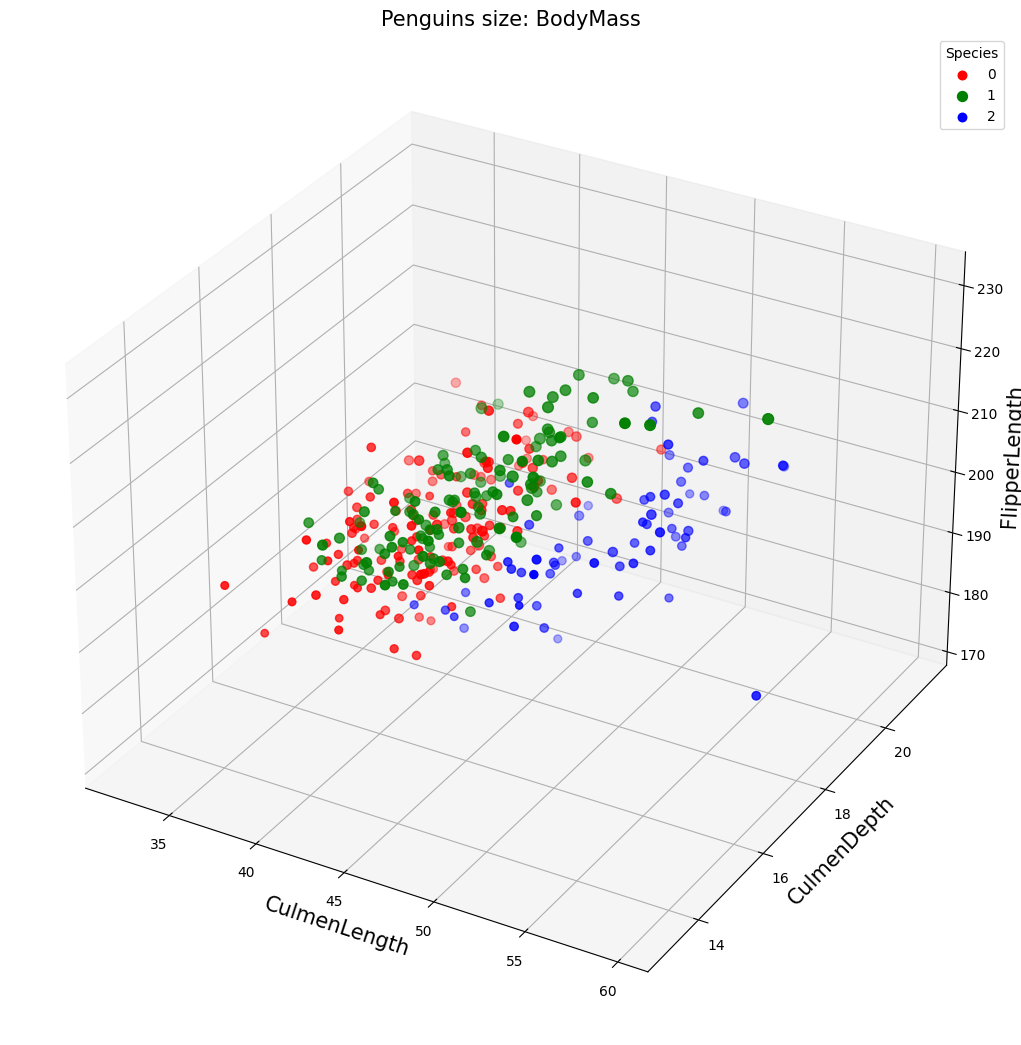

In [6]:
# dataset visualization
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguins.loc[penguins['Species']==0, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==0,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==0, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==0,'BodyMass']*0.01,
                 c='red', label='0')
img = ax.scatter(xs=penguins.loc[penguins['Species']==1, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==1,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==1, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==1,'BodyMass']*0.01,
                 c='green', label='1')
img = ax.scatter(xs=penguins.loc[penguins['Species']==2, 'CulmenLength'],
                 ys=penguins.loc[penguins['Species']==2,'CulmenDepth'],
                 zs=penguins.loc[penguins['Species']==2, 'FlipperLength'],
                 s=penguins.loc[penguins['Species']==2,'BodyMass']*0.01,
                 c='blue', label='2')
ax.set_xlabel(xlabel='CulmenLength', size=15)
ax.set_ylabel(ylabel='CulmenDepth', size=15)
ax.set_zlabel(zlabel='FlipperLength', size=15)
ax.set_title('Penguins size: BodyMass', size=15)
plt.legend(title='Species')
plt.show()

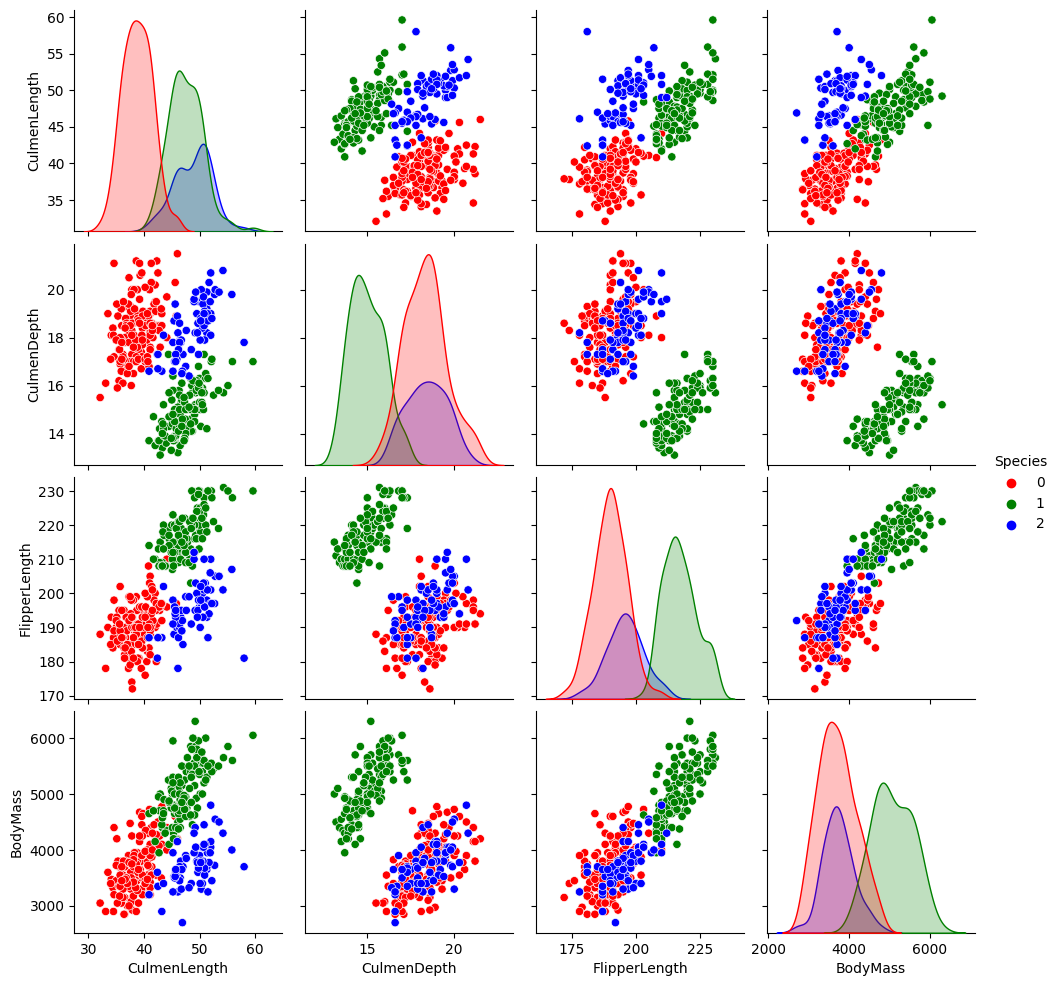

In [7]:
# chackvariables correlation
sns.pairplot(penguins,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

As you can see, some variables are correlated with each other, most notably **FlipperLength and BodyMass**. Both of them are also correlated with **CulmenLength**. **CulmenDepth** seems to be the least helpful. We can conclude that using only one variable, separating classes is not difficult, especially group **1** vs Rest. Now let's check the Pearson correlation:

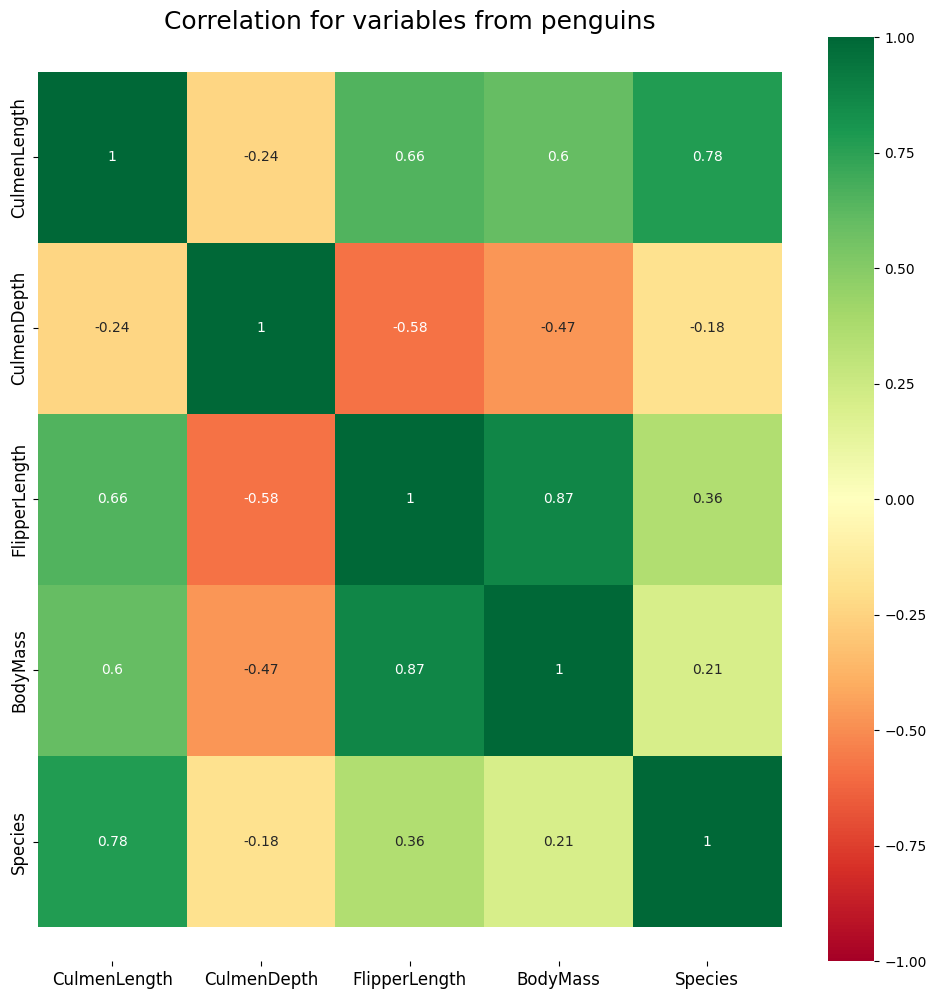

In [8]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(penguins.corr(),
                 xticklabels=penguins.corr().columns,
                 yticklabels=penguins.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Correlation for variables from penguins', fontsize=18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.2, top - 0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Our earlier assumptions were confirmed, the FlipperLength, BodyMass and CulmenLenght variables are strongly correlated, they carry the same information.

Now it's time to apply **PCA**, but we can't do it on the whole dataset. If we were to apply PCA to the entire set, there would be information **leakage**. We will create an **X** dataframe containing the independent variables and a **y** vector with the dependent variable, then we will divide the data into training and test data. We should **standardize** this training set. The **mean** will be **0** for each variable and the data will be on the same scale. After this operation, we can perform PCA on our file. As much as **50%** of the data will be devoted to the test set, because our entire set is small, and we want the data from the test set to be representative.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = penguins.drop('Species', axis=1).copy()
y = penguins['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguins = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguins.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguins[['PC1', 'PC2','PC3','PC4']] = train_penguins[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguins.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,4.973308e-17,2.509932e-16,-6.186377e-18,0.426933
PC2,4.973308e-17,1.000000e+00,-3.172435e-17,-1.113583e-16,0.365677
PC3,2.509932e-16,-3.172435e-17,1.000000e+00,2.027349e-16,0.626119
PC4,-6.186377e-18,-1.113583e-16,2.027349e-16,1.000000e+00,-0.028837
Species,4.269326e-01,3.656773e-01,6.261193e-01,-2.883655e-02,1.000000


Newly created variables are **no longer correlated** with each other.

Now we will create a distribution of features according to the newly created components. The greater the share of the original feature in the component, the darker its color on the graph.

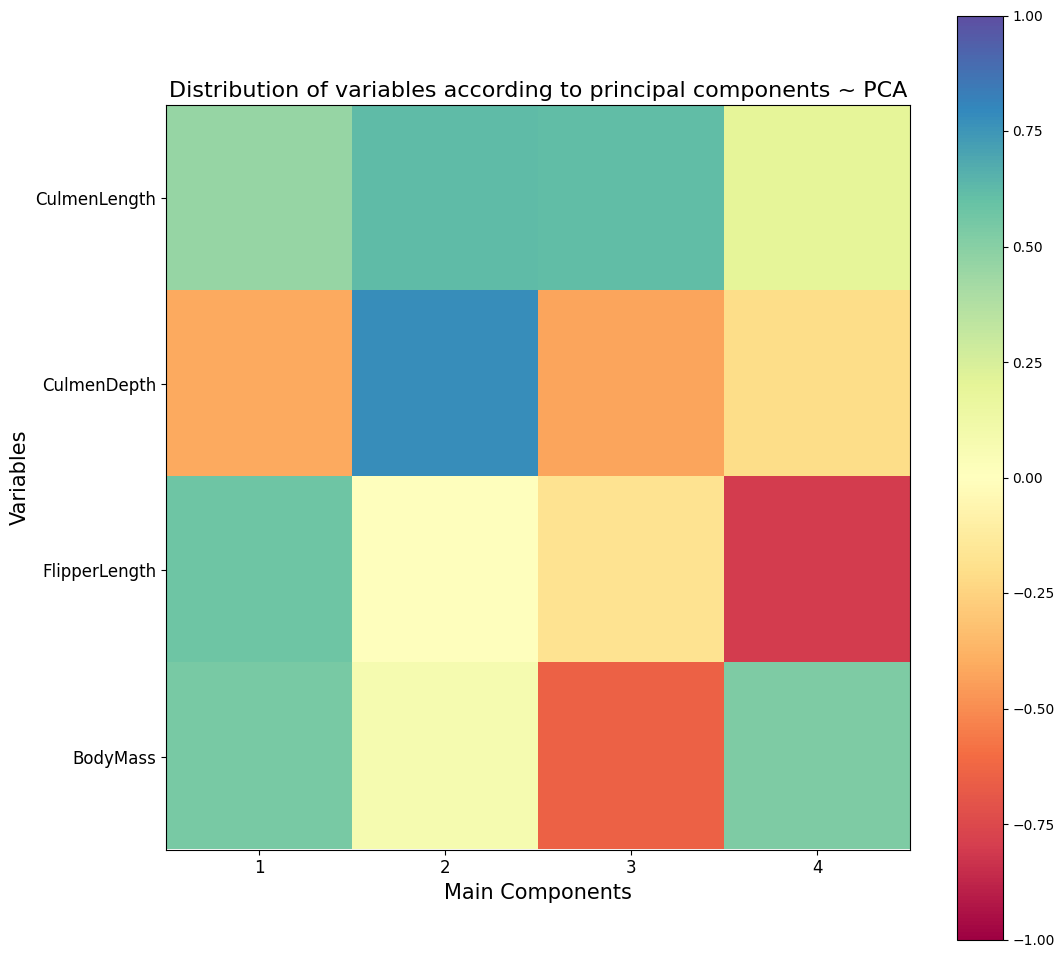

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Main Components', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.title('Distribution of variables according to principal components ~ PCA', fontsize=16)
plt.colorbar()
plt.show()

We confirm what we have already verified. The first Principal Component was created on the basis of correlated variables. The second principal component is interesting because we did not see a significant correlation between CulmenLenght and CulmenDepth.

**Dimension reduction** without significant loss of information
The previous graph shows how much information is contained in each of the Principles. To select the appropriate number of components, we can use the **elbow method** known from the selection of the hyperparameter K for the KMeans model. Another form of visualization is a **stacked chart**.

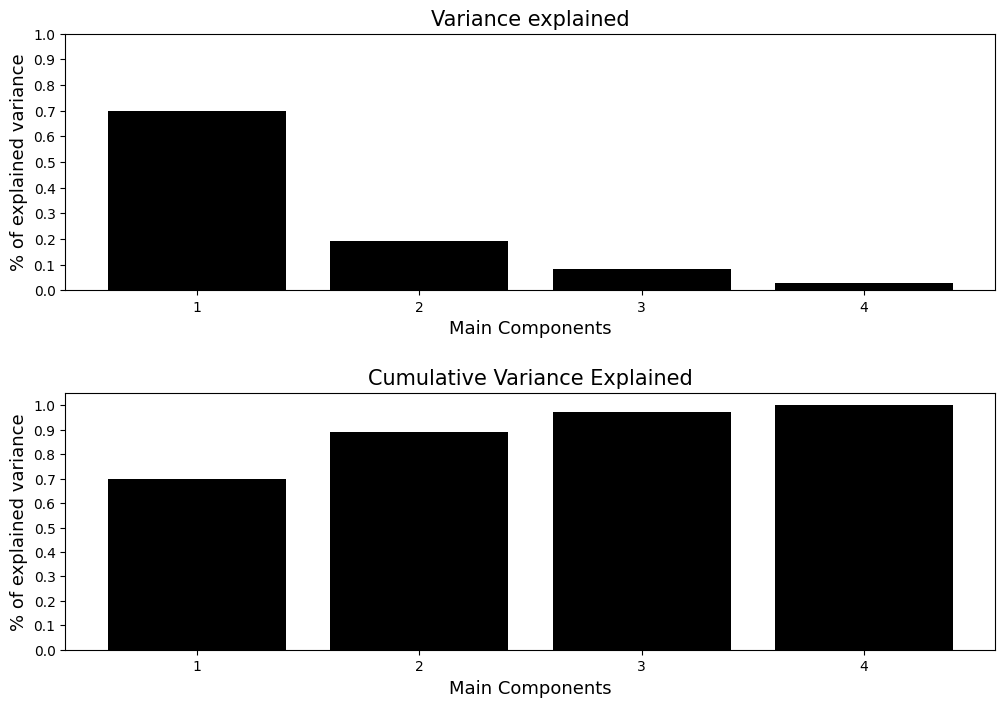

Main Component: 1, Variance explained: 0.69963, Cumulative Variance Explained: 0.69963
Main Component: 2, Variance explained: 0.19098, Cumulative Variance Explained: 0.89061
Main Component: 3, Variance explained: 0.08227, Cumulative Variance Explained: 0.97288
Main Component: 4, Variance explained: 0.02712, Cumulative Variance Explained: 1.0


In [11]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Variance explained', fontsize=15)
plt.xlabel('Main Components', fontsize=13)
plt.ylabel('% of explained variance', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Cumulative Variance Explained', fontsize=15)
plt.xlabel('Main Components', fontsize=13)
plt.ylabel('% of explained variance', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Main Component: {principal_component}, Variance explained: {np.round(explained_var, 5)}, Cumulative Variance Explained: {np.round(cum_explained_var, 5)}')
    principal_component += 1

The above analysis shows that more than 95% of the variance is explained by two Principal Components.

**Visualization of multidimensional data using variable reduction.**

Using dimension reduction methods, we can "flatten" the number of dimensions of a set and visualize it in two-dimensional space.

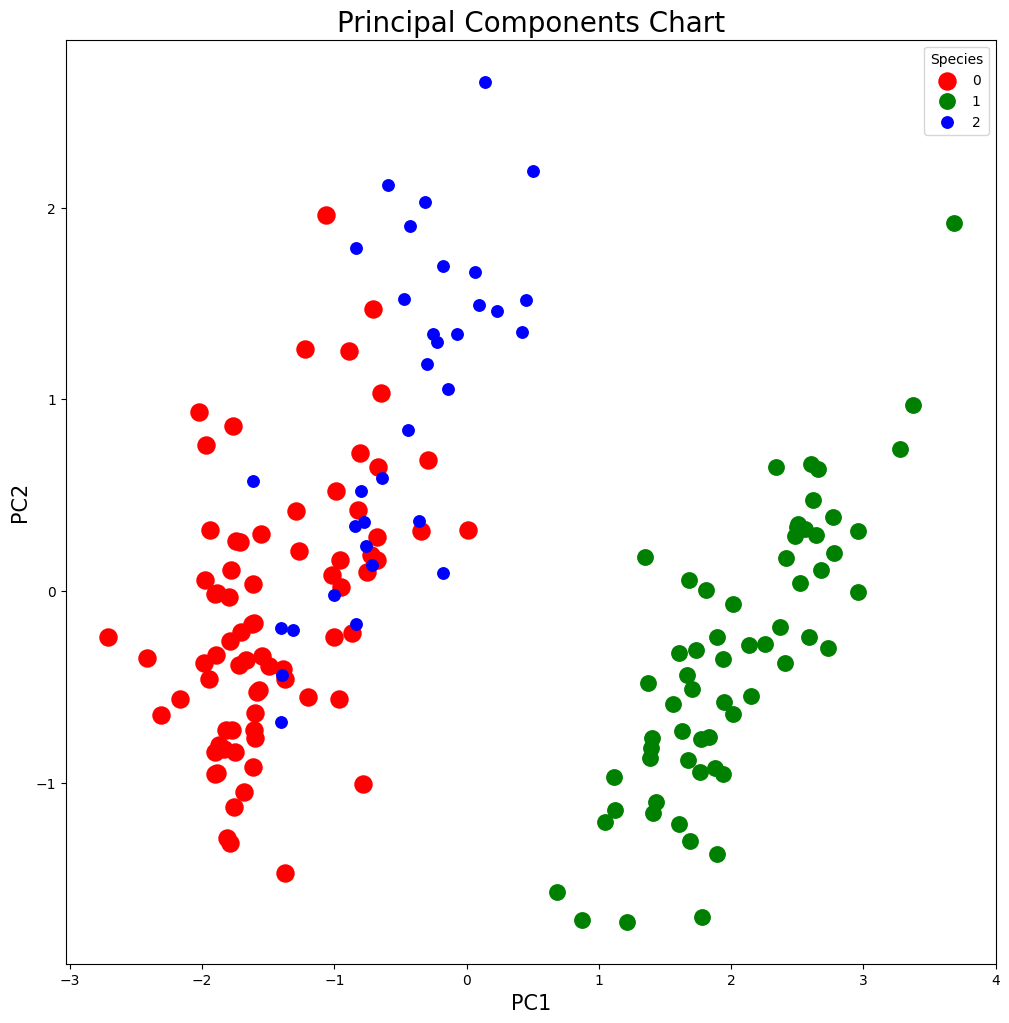

In [12]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguins.loc[train_penguins['Species']== 0, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']== 0,'PC2'],
            c='red', label='0', s=151)
plt.scatter(x=train_penguins.loc[train_penguins['Species']== 1, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']== 1,'PC2'],
            c='green', label='1', s=123)
plt.scatter(x=train_penguins.loc[train_penguins['Species']== 2, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']== 2,'PC2'],
            c='blue', label='2', s=68)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Principal Components Chart', size=20)
plt.legend(title='Species')
plt.show()

Group **1** is well separated from the rest of the classes. Groups **0** and **2** have an unclear boundary to separate these classes, which may reduce accuracy.

Now we will train our model on the training set and test its capabilities on the test set. We will use **logistic regression**. We will train the model on the **original set**, then on the **normalized set** and **all principal components**.

In [13]:
from pandas.core.reshape.tile import to_datetime
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
  classifier = LogisticRegression(max_iter=100000)
  start = datetime.datetime.now()
  classifier.fit(Xtrain, ytrain)
  end = datetime.datetime.now()
  time = (end - start).microseconds
  evaluation = np.round(classifier.score(Xtest, ytest), 4)
  return evaluation, time

results = PrettyTable(['Model',
                      'Accuracy',
                      'Training time (microseconds)'])

# training the model on the raw set
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Unscaled data', not_scaled_data[0], not_scaled_data[1]])

# training the model on the processed set
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Scaled data', scaled_data[0], scaled_data[1]])

# training the model on the four Principal Components
PCA4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PCA', PCA4_data[0], PCA4_data[1]])

# training the model on the three Principal Components
PCA3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PCA', PCA3_data[0], PCA3_data[1]])

# training the model on the two Principal Components
PCA2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PCA', PCA2_data[0], PCA2_data[1]])

# training the model on the one Principal Component
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1], y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+---------------+----------+------------------------------+
|     Model     | Accuracy | Training time (microseconds) |
+---------------+----------+------------------------------+
| Unscaled data |  0.9942  |            311695            |
|  Scaled data  |   1.0    |             7338             |
|     4 PCA     |   1.0    |             7224             |
|     3 PCA     |  0.9942  |             6802             |
|     2 PCA     |  0.9181  |            58013             |
|      1 PC     |  0.9298  |            21258             |
+---------------+----------+------------------------------+


The penguins DataFrame is quite small by machine learning standards. The best solution would be to use three Principal Components, in this way we get a fast learning time and good classification quality.